# Analyze CPP Code 

In [6]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [7]:
class reader: 
    def __self__(self,fname_=''):
        self.fname=fname
    def importData(self,fname=''):
        self.data=loadtxt(fname)
        self.x=self.data[:,0]
        self.y=self.data[:,1]

In [8]:
readE=reader()
readE.importData('TempEnergy_SimpleSampling.dat')
readM=reader()
readM.importData('TempMagnet_SimpleSampling.dat')

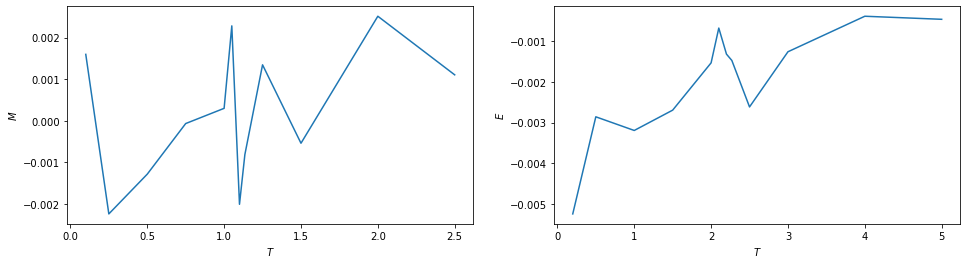

In [9]:
%matplotlib inline 
J=1.
D=2.
#Onsager

#MeanField: x=T/Tc
Tc_MF=D*J
def S_MF(x,S):
    S_new=np.tanh(1./x*S)
    if(abs(S-S_new).all() < 0.0001):
        return S_new
    else:
        return S_MF(x,S_new)
X=np.linspace(0,max(readM.x),100)
figure(figsize=(16,4))
subplot(121)
xlabel('$T$')
ylabel('$M$')
plot(readM.x/Tc_MF,readM.y,label='sim')
#plot(X/Tc_MF,S_MF(X,0.5),label='MF')
subplot(122)
xlabel('$T$')
ylabel('$E$')
plot(readE.x,readE.y,label='sim')

# Analyze time series 

In [10]:
readEIS=reader()
readEIS.importData('TimeSeriesEnergy_ImportanceSampling.dat')
readMIS=reader()
readMIS.importData('TimeSeriesMagnet_ImportanceSampling.dat')

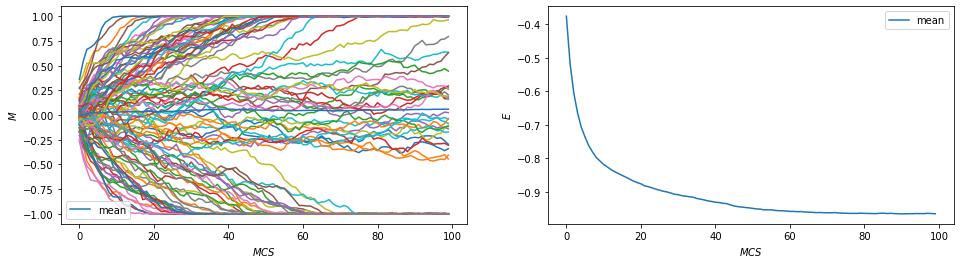

In [12]:
figure(figsize=(16,4))
subplot(121)
xlabel('$MCS$')
ylabel('$M$')

avM=np.sum(readMIS.data[:,1:],axis=1)/readMIS.data[:,1:].shape[1]
avE=np.sum(readEIS.data[:,1:],axis=1)/readEIS.data[:,1:].shape[1]
for i in range(readMIS.data[0].size-1):
    plot(readMIS.x,readMIS.data[:,i+1])
plot(readMIS.x,avM, label='mean')
legend(loc='best')
subplot(122)
xlabel('$MCS$')
ylabel('$E$')
# for i in range(readEIS.data[0].size-1):
#     plot(readEIS.x,readEIS.data[:,i+1])
plot(readEIS.x,avE, label='mean')
legend(loc='best')

In [41]:
readEIS=reader()
readEIS.importData('TempEnergy_ImportanceSampling.dat')
readMIS=reader()
readMIS.importData('TempMagnet_ImportanceSampling.dat')

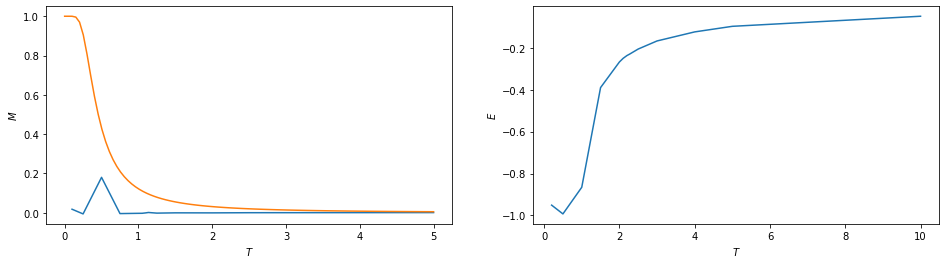

In [7]:
%matplotlib inline 
X=np.linspace(0,max(readMIS.x),100)
figure(figsize=(16,4))
subplot(121)
xlabel('$T$')
ylabel('$M$')
plot(readMIS.x/Tc_MF,readMIS.y,label='sim')
plot(X/Tc_MF,S_MF(X,0.5),label='MF')
subplot(122)
xlabel('$T$')
ylabel('$E$')
plot(readEIS.x,readEIS.y,label='sim')